# Importing Necessary Libraries

In [186]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV

from sklearn import linear_model, tree, ensemble, svm

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn import tree
import graphviz 
import statsmodels.api as sm

from matplotlib import colors

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## Reading Data From File

In [187]:
df = pd.read_csv('ds-dataset.csv')
cmap = colors.ListedColormap(['orange', 'blue'])


### Knowing The Data

In [188]:
shape = df.shape
shape

(164933, 7)

In [189]:
attributes = list(df.columns.values)

In [190]:
attributes

['Unnamed: 0', 'ts', 'user_id', 'os', 'browser', 'plan', 'page']

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164933 entries, 0 to 164932
Data columns (total 7 columns):
Unnamed: 0    164933 non-null int64
ts            164933 non-null object
user_id       164933 non-null object
os            164933 non-null object
browser       164755 non-null object
plan          164437 non-null object
page          164933 non-null object
dtypes: int64(1), object(6)
memory usage: 8.8+ MB


## Warning: there are missing values on plan and browser we should handle later

In [192]:
df.describe()

,Unnamed: 0
count,164933.000000
mean,82466.000000
std,47612.200311
min,0.000000
25%,41233.000000
50%,82466.000000
75%,123699.000000
max,164932.000000


In [193]:
df.head()

,Unnamed: 0,ts,user_id,os,browser,plan,page
0,0,2020-01-02 20:17:20.623000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge
1,1,2020-01-03 10:22:31.619000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete
2,2,2020-01-05 02:21:24.924000,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg
3,3,2020-01-05 02:21:44.378000,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate
4,4,2020-01-19 02:23:02.320000,212955203693754102065312977639302287127,windows,Firefox,monthly,compress


In [194]:
df.nunique()

Unnamed: 0    164933
ts            161529
user_id         8213
os                 5
browser            6
plan               2
page              17
dtype: int64

#### Getting 20% Of High Used Users

In [195]:
xd = df["user_id"].value_counts()
xd

62966500438657575252837451397712134966     5506
265995907415006206495118940319872679990    1964
149778293702096290805571147151318472123    1521
70783149580088580103192490613649001201     1432
196957829457798244032145924719876605144    1390
308099108902250173915243765131776925163    1382
46983975555865504090931950468493614814     1295
320957415695501006141671103814167549418    1292
75396424659681162411344589757682756744     1250
298923028823531715531622662699888180708    1224
292617079070639478109372366790157981058    1191
203349693762880770520413006313786339234    1182
234453100228854494589792409469031366971    1162
118518508112876607992834939938640664603    1130
246568287320280187458842278137309067870    1045
252124669277924676961692389377169487974    1006
183867713686545338157409281968580825289    1000
200175012629858384347176537823771147392     962
293702419214756332167638739864479858241     914
63604612277369424278422421180580112985      882
283988416763519157002641953096058045853 

In [196]:
hu = xd[:xd.shape[0]//5]
hu.to_frame()
tmp = pd.DataFrame({'user_id':hu.index, 'count':hu.values})
lst = tmp["user_id"]

In [197]:
cut = df.query('user_id in @lst')
cut

,Unnamed: 0,ts,user_id,os,browser,plan,page
0,0,2020-01-02 20:17:20.623000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge
1,1,2020-01-03 10:22:31.619000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete
2,2,2020-01-05 02:21:24.924000,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg
3,3,2020-01-05 02:21:44.378000,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate
4,4,2020-01-19 02:23:02.320000,212955203693754102065312977639302287127,windows,Firefox,monthly,compress
5,5,2020-03-02 21:03:21.581000,306450168057320033204057377118043185554,windows,Chrome,monthly,edit
7,7,2020-03-30 15:02:19.556000,318139404228635831848843550614879854428,windows,Firefox,monthly,word
9,9,2020-05-01 05:50:53.976000,188797848520599583326060808692786058342,windows,Chrome,monthly,merge
10,10,2020-05-05 03:01:59.204000,188797848520599583326060808692786058342,windows,Chrome,monthly,merge
11,11,2020-04-13 07:36:01.827000,170550884034225800986175135069524946984,windows,Firefox,monthly,edit


In [198]:
features = cut.drop("Unnamed: 0", 1)
features = features.drop("user_id", 1)
features = features.drop("ts", 1)
features

,os,browser,plan,page
0,mac_os,Firefox,monthly,merge
1,mac_os,Firefox,monthly,delete
2,windows,Firefox,monthly,jpg
3,windows,Firefox,monthly,rotate
4,windows,Firefox,monthly,compress
5,windows,Chrome,monthly,edit
7,windows,Firefox,monthly,word
9,windows,Chrome,monthly,merge
10,windows,Chrome,monthly,merge
11,windows,Firefox,monthly,edit


In [199]:
tmp = pd.DataFrame({'user_id':xd.index, 'count':xd.values})
tmp

,user_id,count
0,62966500438657575252837451397712134966,5506
1,265995907415006206495118940319872679990,1964
2,149778293702096290805571147151318472123,1521
3,70783149580088580103192490613649001201,1432
4,196957829457798244032145924719876605144,1390
5,308099108902250173915243765131776925163,1382
6,46983975555865504090931950468493614814,1295
7,320957415695501006141671103814167549418,1292
8,75396424659681162411344589757682756744,1250
9,298923028823531715531622662699888180708,1224


In [200]:
mean = tmp["count"].mean()
print("mean", mean)
median = tmp["count"].median()
print("median", median)
mean = median

mean 20.08194326068428
median 3.0


In [201]:
returned="Yes"
changing = df.copy()
tmp["returned"]= returned
changing["returned"] = returned
changing = changing.drop("Unnamed: 0", 1)
changing = changing.drop("ts", 1)
users = tmp["user_id"][tmp["count"]<mean]

user = pd.DataFrame({'id':users.index, 'user_id':users.values})
lst = user["user_id"].tolist()
tmp["returned"][tmp["count"]<mean]="No"
for i in range(changing.shape[0]):
    if changing.iloc[i]["user_id"] in lst:
        changing.iloc[i]["returned"] = "No"
        lst.remove(changing.iloc[i]["user_id"])
changing


C:\Users\Hamed Khashehchi\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,user_id,os,browser,plan,page,returned
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes
5,306450168057320033204057377118043185554,windows,Chrome,monthly,edit,Yes
6,145586684452392352814476970120965953708,windows,Firefox,monthly,word,Yes
7,318139404228635831848843550614879854428,windows,Firefox,monthly,word,Yes
8,40194111970084246732835543804645497149,windows,Firefox,yearly,word,No
9,188797848520599583326060808692786058342,windows,Chrome,monthly,merge,Yes


In [202]:
save = changing.copy()

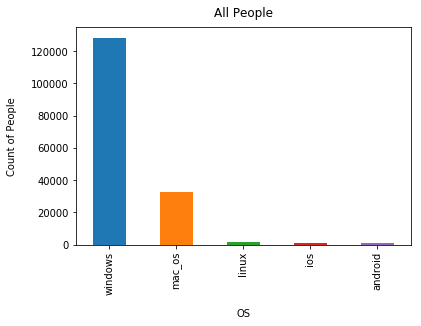

In [203]:
df['os'].value_counts().plot(kind='bar')
plt.xlabel("OS", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("All People", y=1.02);

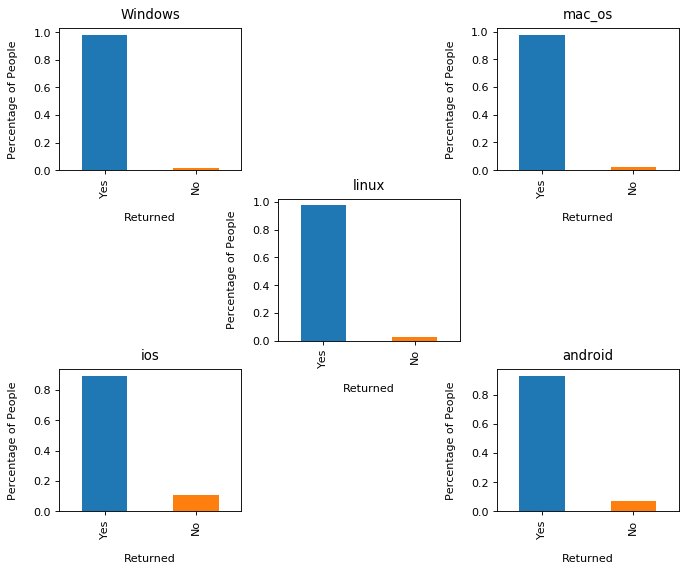

In [204]:
figure(figsize=(10, 8), dpi=80)
plt.subplot(331)
changing.loc[changing["os"]=="windows", "returned"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of People", labelpad=14)
plt.title("Windows", y=1.02);
plt.subplot(333)
changing.loc[changing["os"]=="mac_os", "returned"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of People", labelpad=14)
plt.title("mac_os", y=1.02);
plt.subplot(335)
changing.loc[changing["os"]=="linux", "returned"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of People", labelpad=14)
plt.title("linux", y=1.02);
plt.subplot(337)
changing.loc[changing["os"]=="ios", "returned"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of People", labelpad=14)
plt.title("ios", y=1.02);
plt.subplot(339)
changing.loc[changing["os"]=="android", "returned"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of People", labelpad=14)
plt.title("android", y=1.02);

# notification for mobile users that we got personal computer versions

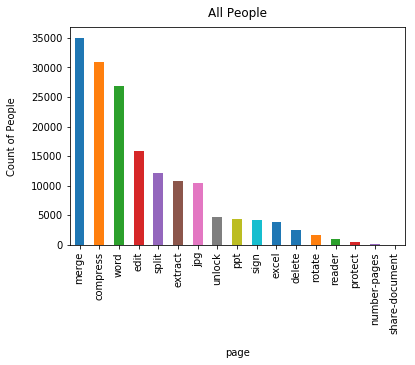

In [205]:
df['page'].value_counts().plot(kind='bar')
plt.xlabel("page", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("All People", y=1.02);

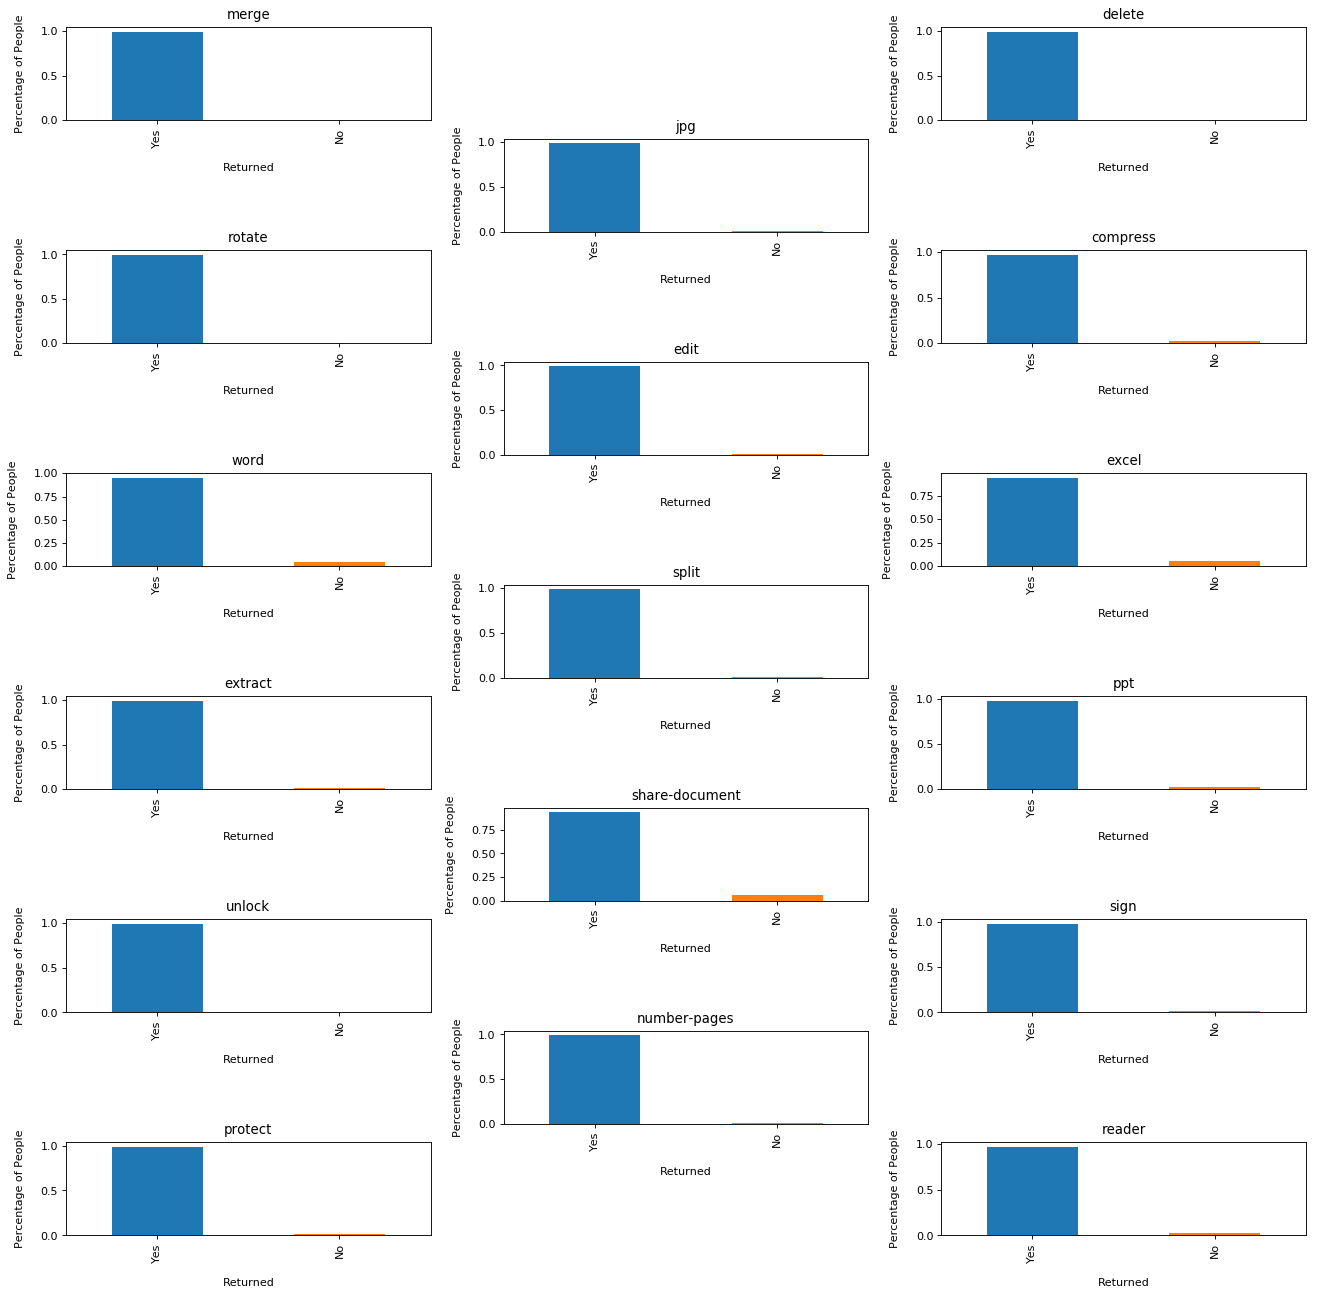

In [206]:
figure(figsize=(20, 20), dpi=80)
pages = changing['page'].unique()
for i in range(pages.shape[0]):
    plt.subplot(11, 3, 1+i*2)
    changing.loc[changing["page"]==pages[i], "returned"].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel("Returned", labelpad=14)
    plt.ylabel("Percentage of People", labelpad=14)
    plt.title(pages[i], y=1.02);

# To Excel users and shared document users: we got other features that you might wanna check, ( not word because they are a huge member of society thats why they might not retain )

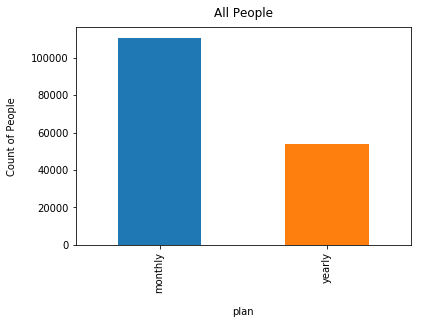

In [207]:
df['plan'].value_counts().plot(kind='bar')
plt.xlabel("plan", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("All People", y=1.02);

## Handling missing value ( replacing with mode because this is the most likely answer )

In [208]:
for column in changing.columns:
    changing[column].fillna(changing[column].mode()[0], inplace=True)

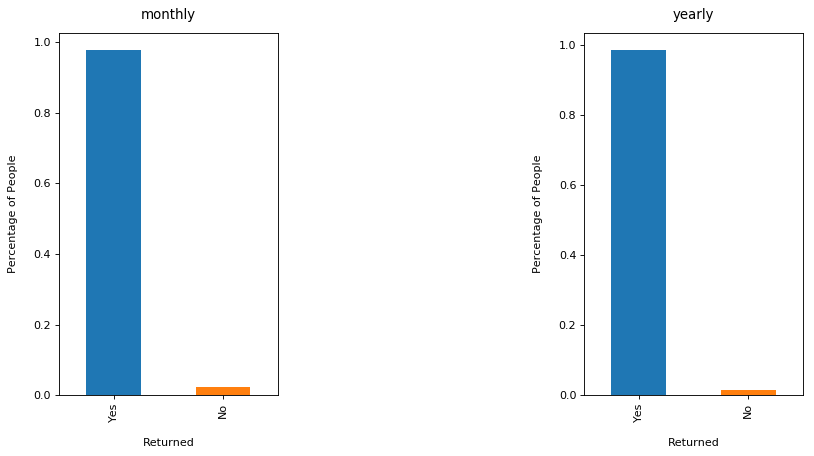

In [209]:
figure(figsize=(12, 6), dpi=80)
plans = changing['plan'].unique()
for i in range(plans.shape[0]):
    plt.subplot(1, 3, 1+i*2)
    changing.loc[changing["plan"]==plans[i], "returned"].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel("Returned", labelpad=14)
    plt.ylabel("Percentage of People", labelpad=14)
    plt.title(plans[i], y=1.02);

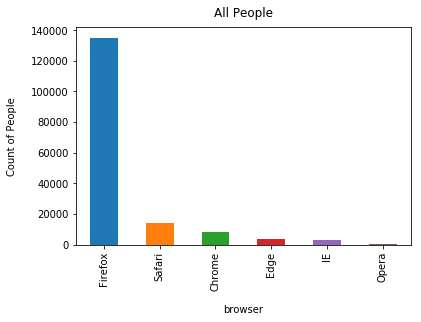

In [210]:
df['browser'].value_counts().plot(kind='bar')
plt.xlabel("browser", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("All People", y=1.02);

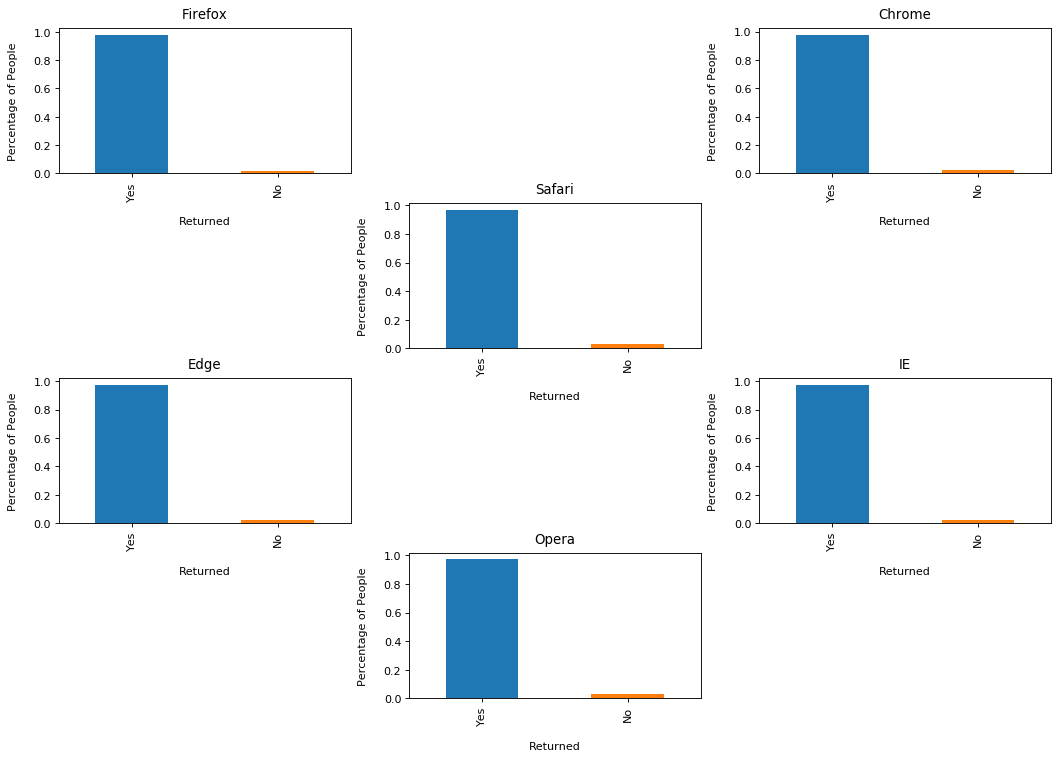

In [211]:
figure(figsize=(16, 14), dpi=80)
browsers = changing['browser'].unique()
for i in range(browsers.shape[0]):
    plt.subplot(5, 3, 1+i*2)
    changing.loc[changing["browser"]==browsers[i], "returned"].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel("Returned", labelpad=14)
    plt.ylabel("Percentage of People", labelpad=14)
    plt.title(browsers[i], y=1.02);

In [212]:
changing = changing.drop("user_id", 1)
changing


,os,browser,plan,page,returned
0,mac_os,Firefox,monthly,merge,Yes
1,mac_os,Firefox,monthly,delete,Yes
2,windows,Firefox,monthly,jpg,Yes
3,windows,Firefox,monthly,rotate,Yes
4,windows,Firefox,monthly,compress,Yes
5,windows,Chrome,monthly,edit,Yes
6,windows,Firefox,monthly,word,Yes
7,windows,Firefox,monthly,word,Yes
8,windows,Firefox,yearly,word,No
9,windows,Chrome,monthly,merge,Yes


## saving for weka

In [213]:
changing.to_csv("changed.csv")

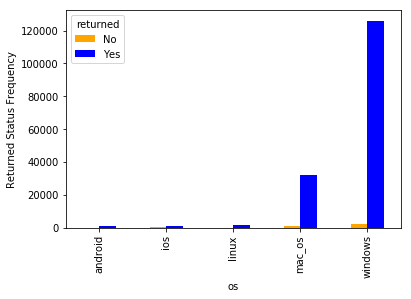

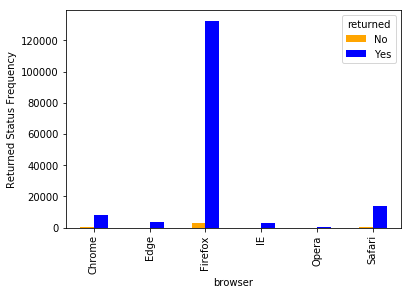

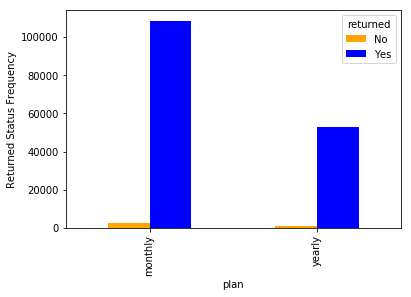

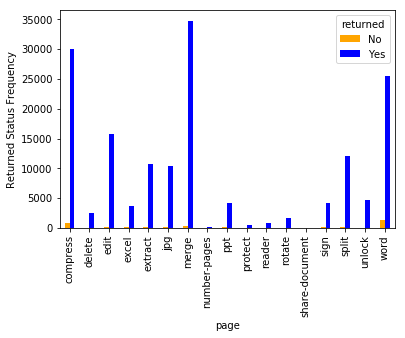

In [214]:
attributes = list(changing.columns.values)
attributes.remove(attributes[len(attributes)-1])
for i in attributes:

    pd.crosstab(changing[i], changing.returned).plot(kind = 'bar', colormap=cmap)
    plt.xlabel('{}'.format(i))
    plt.ylabel('Returned Status Frequency')
    
plt.show()

In [215]:
uniques = list(map(lambda col: changing[col].nunique(), attributes))
dikt = dict(zip(attributes, uniques))

sorted(dikt.items(), key=lambda x: x[1])

[('plan', 2), ('os', 5), ('browser', 6), ('page', 17)]

In [216]:
for var in attributes:
    cList = 'var' + '_' + 'var'
    cList = pd.get_dummies(changing[var], prefix=var)
    df_New = pd.concat([changing, cList],axis = 1)
    changing = df_New

changing


,os,browser,plan,page,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,mac_os,Firefox,monthly,merge,Yes,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,mac_os,Firefox,monthly,delete,Yes,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,windows,Firefox,monthly,jpg,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,windows,Firefox,monthly,rotate,Yes,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,windows,Firefox,monthly,compress,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,windows,Chrome,monthly,edit,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,windows,Firefox,monthly,word,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,windows,Firefox,monthly,word,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,windows,Firefox,yearly,word,No,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,windows,Chrome,monthly,merge,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [217]:
data_vars = changing.columns.values.tolist()

to_keep = [i for i in data_vars if i not in attributes]

to_keep

['returned',
 'os_android',
 'os_ios',
 'os_linux',
 'os_mac_os',
 'os_windows',
 'browser_Chrome',
 'browser_Edge',
 'browser_Firefox',
 'browser_IE',
 'browser_Opera',
 'browser_Safari',
 'plan_monthly',
 'plan_yearly',
 'page_compress',
 'page_delete',
 'page_edit',
 'page_excel',
 'page_extract',
 'page_jpg',
 'page_merge',
 'page_number-pages',
 'page_ppt',
 'page_protect',
 'page_reader',
 'page_rotate',
 'page_share-document',
 'page_sign',
 'page_split',
 'page_unlock',
 'page_word']

In [218]:
ready = changing[to_keep]

ready.columns.values

array(['returned', 'os_android', 'os_ios', 'os_linux', 'os_mac_os',
       'os_windows', 'browser_Chrome', 'browser_Edge', 'browser_Firefox',
       'browser_IE', 'browser_Opera', 'browser_Safari', 'plan_monthly',
       'plan_yearly', 'page_compress', 'page_delete', 'page_edit',
       'page_excel', 'page_extract', 'page_jpg', 'page_merge',
       'page_number-pages', 'page_ppt', 'page_protect', 'page_reader',
       'page_rotate', 'page_share-document', 'page_sign', 'page_split',
       'page_unlock', 'page_word'], dtype=object)

In [219]:
ready['returned'] = ready['returned'].replace(['Yes','No'], [1,0])


C:\Users\Hamed Khashehchi\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [220]:
ready

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
label = np.array(ready['returned'])

features = ready.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [222]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)

In [223]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [224]:
y_pred = rf.predict(test_X)

In [225]:
acc = accuracy_score(test_Y, y_pred)

In [226]:
acc

0.9783247946160609

In [42]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[    1   711]
 [    4 32271]]

Classification Report
             precision    recall  f1-score   support

          0       0.20      0.00      0.00       712
          1       0.98      1.00      0.99     32275

avg / total       0.96      0.98      0.97     32987



In [43]:
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=13)

count = 1

for train_index, test_index in kfold.split(feature, label):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 141370,Validation set:23563
Fold:2, Train set: 141370,Validation set:23563
Fold:3, Train set: 141370,Validation set:23563
Fold:4, Train set: 141372,Validation set:23561
Fold:5, Train set: 141372,Validation set:23561
Fold:6, Train set: 141372,Validation set:23561
Fold:7, Train set: 141372,Validation set:23561


In [44]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 13), feature, label, cv= kfold, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.97882273 0.97903493 0.97895005 0.97903315 0.97890582 0.97907559
 0.9789907 ]
Average score: 0.98


In [45]:
model = GradientBoostingClassifier(random_state=13)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model,space, scoring='accuracy',cv = kfold, refit=True)
result = search.fit(train_X, train_Y)

In [46]:
best = result.best_estimator_

y_pred = best.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

0.9784157395337557

In [47]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[    0   712]
 [    0 32275]]

Classification Report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       712
          1       0.98      1.00      0.99     32275

avg / total       0.96      0.98      0.97     32987



C:\Users\Hamed Khashehchi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf.fit(train_X, train_Y)

C:\Users\Hamed Khashehchi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=1e-05, verbose=False))])

In [49]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

C:\Users\Hamed Khashehchi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9755964470852154

In [50]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[    4   708]
 [   97 32178]]

Classification Report
             precision    recall  f1-score   support

          0       0.04      0.01      0.01       712
          1       0.98      1.00      0.99     32275

avg / total       0.96      0.98      0.97     32987



In [51]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 8, 4, 2), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(131946, 30)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 8, 4, 2), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [52]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.9784157395337557

In [53]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[    0   712]
 [    0 32275]]

Classification Report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       712
          1       0.98      1.00      0.99     32275

avg / total       0.96      0.98      0.97     32987



C:\Users\Hamed Khashehchi\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([1], dtype=int64)

In [54]:
clf = tree.DecisionTreeClassifier()
fig = clf.fit(train_X, train_Y)

In [55]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.9783247946160609

In [56]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[    1   711]
 [    4 32271]]

Classification Report
             precision    recall  f1-score   support

          0       0.20      0.00      0.00       712
          1       0.98      1.00      0.99     32275

avg / total       0.96      0.98      0.97     32987



array([0, 1], dtype=int64)

In [57]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     76.60
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:50:03   Log-Likelihood:                 70824.
No. Observations:              131946   AIC:                        -1.416e+05
Df Residuals:                  131916   BIC:                        -1.413e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.613e+08   4.67e+09      0.120      0.904    -8.6e+09    9.72e+09
x2          5.613e+08   4.67e+09      0.120      0.904    -8.6e+09    9.72e+09
x3          5.613e+08   4.67e+09      0.120      0.904    -8.6e+09    9.72e+09
x4          5.613e+08   4.67e+09      0.120      0.904    -8.6e+09    9.72e+09
x5          5.613e+08   4.67e+09      0.120      0.904    -8.6e+09    9.72e+09
x6         -4.065e+08   3.88e+09     -0.105      0.917   -8.02e+09    7.21e+09
x7         -4.065e+08   3.88e+09     -0.105      0.917   -8.02e+09    7.21e+09
x8         -4.065e+08   3.88e+09     -0.105      0.917   -8.02e+09    7.21e+09
x9         -4.065e+08   3.88e+09     -0.105      0.917   -8.02e+09    7.21e+09
x10        -4.065e+08   3.88e+09     -0.105      0.917   -8.02e+09    7.21e+09
x11        -4.065e+08   3.88e+09     -0.105      0.917   -8.02e+09    7.21e+09
x12        -2.061e+08   2.07e+09     -0.100      0.921   -4.26e+09    3.85e+09
x13        -2.061e+08   2.07e+09     -0.100      0.921   -4.26e+09    3.85e+09
x14         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x15         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x16         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x17         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x18         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x19         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x20         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x21         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x22         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x23         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x24         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x25         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x26         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x27         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x28         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x29         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
x30         5.132e+07   3.95e+09      0.013      0.990   -7.69e+09    7.79e+09
==============================================================================
Omnibus:                   154788.863   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10557998.191
Skew:                          -6.557   Prob(JB):                         0.00
Kurtosis:                      44.815   Cond. No.                     6.62e+13
==============================================================================

N

In [58]:
yes_percent = ready["returned"].sum()/len(ready)
yes_percent
yes_total =ready["returned"].sum()
yes_total

161479

In [59]:
no_percent = 1 - yes_percent
no_percent
no_total = len(ready) - yes_total
no_total

3454

# Warning: With these result we notice that Data is Imbalanced The approach handling the imbalanced data usually is downsampling and upsampling: my approach here is choose one record for each customer so they don't flood and ovepower the data (mode) OR another approach is merge a user into one row (all_in_one)!

In [60]:
for column in save.columns:
    save[column].fillna(save[column].mode()[0], inplace=True)
save

,user_id,os,browser,plan,page,returned
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes
5,306450168057320033204057377118043185554,windows,Chrome,monthly,edit,Yes
6,145586684452392352814476970120965953708,windows,Firefox,monthly,word,Yes
7,318139404228635831848843550614879854428,windows,Firefox,monthly,word,Yes
8,40194111970084246732835543804645497149,windows,Firefox,yearly,word,No
9,188797848520599583326060808692786058342,windows,Chrome,monthly,merge,Yes


In [61]:
attributes = list(df.columns.values)
print(attributes)
attributes.remove('ts')
attributes.remove('Unnamed: 0')
attributes.remove('user_id')
attributes

['Unnamed: 0', 'ts', 'user_id', 'os', 'browser', 'plan', 'page']


['os', 'browser', 'plan', 'page']

In [62]:

uniques = list(map(lambda col: save[col].nunique(), attributes))
dikt = dict(zip(attributes, uniques))

sorted(dikt.items(), key=lambda x: x[1])

[('plan', 2), ('os', 5), ('browser', 6), ('page', 17)]

In [63]:
xFd = save.copy()
for var in attributes:
    cList = 'var' + '_' + 'var'
    cList = pd.get_dummies(xFd[var], prefix=var)
    df_New = pd.concat([xFd, cList],axis = 1)
    xFd = df_New

xFd


,user_id,os,browser,plan,page,returned,os_android,os_ios,os_linux,os_mac_os,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,306450168057320033204057377118043185554,windows,Chrome,monthly,edit,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,145586684452392352814476970120965953708,windows,Firefox,monthly,word,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,318139404228635831848843550614879854428,windows,Firefox,monthly,word,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,40194111970084246732835543804645497149,windows,Firefox,yearly,word,No,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,188797848520599583326060808692786058342,windows,Chrome,monthly,merge,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data_vars = xFd.columns.values.tolist()

to_keep = [i for i in data_vars if i not in attributes]

to_keep


['user_id',
 'returned',
 'os_android',
 'os_ios',
 'os_linux',
 'os_mac_os',
 'os_windows',
 'browser_Chrome',
 'browser_Edge',
 'browser_Firefox',
 'browser_IE',
 'browser_Opera',
 'browser_Safari',
 'plan_monthly',
 'plan_yearly',
 'page_compress',
 'page_delete',
 'page_edit',
 'page_excel',
 'page_extract',
 'page_jpg',
 'page_merge',
 'page_number-pages',
 'page_ppt',
 'page_protect',
 'page_reader',
 'page_rotate',
 'page_share-document',
 'page_sign',
 'page_split',
 'page_unlock',
 'page_word']

In [65]:
merged = xFd[to_keep].copy()

merged.columns.values

array(['user_id', 'returned', 'os_android', 'os_ios', 'os_linux',
       'os_mac_os', 'os_windows', 'browser_Chrome', 'browser_Edge',
       'browser_Firefox', 'browser_IE', 'browser_Opera', 'browser_Safari',
       'plan_monthly', 'plan_yearly', 'page_compress', 'page_delete',
       'page_edit', 'page_excel', 'page_extract', 'page_jpg',
       'page_merge', 'page_number-pages', 'page_ppt', 'page_protect',
       'page_reader', 'page_rotate', 'page_share-document', 'page_sign',
       'page_split', 'page_unlock', 'page_word'], dtype=object)

In [66]:
merged['returned'] = merged['returned'].replace(['Yes','No'], [1,0])
merged

,user_id,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,196669322373702694527343919754227674361,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,196669322373702694527343919754227674361,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,212955203693754102065312977639302287127,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,212955203693754102065312977639302287127,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,212955203693754102065312977639302287127,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,306450168057320033204057377118043185554,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,145586684452392352814476970120965953708,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,318139404228635831848843550614879854428,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,40194111970084246732835543804645497149,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,188797848520599583326060808692786058342,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
all_merge = merged.groupby('user_id').sum()
all_merge

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,128,0.0,0.0,0.0,0.0,128.0,0.0,0.0,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,35,0.0,0.0,0.0,0.0,35.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0
10022870653033837263302996978880956235,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100260128896771874314433414539792415509,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100278847650473346718996516411374784382,16,0.0,0.0,0.0,0.0,16.0,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100342456014438230713389942853501555711,16,0.0,0.0,0.0,0.0,16.0,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
clipped = all_merge.clip(0, 1, axis=1).copy()
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10022870653033837263302996978880956235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100260128896771874314433414539792415509,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100278847650473346718996516411374784382,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100342456014438230713389942853501555711,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# We did Feature Engineering and downsampling Considering the data and models we had

In [69]:
yes_percent = clipped["returned"].sum()/len(clipped)
yes_percent
yes_total =clipped["returned"].sum()
yes_total

5977.0

In [70]:
no_percent = 1 - yes_percent
no_percent
no_total = len(clipped) - yes_total
no_total

2236.0

In [71]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [72]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)

In [73]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(30,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(train_X, train_Y,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
6570/6570 [==============================] - 58s 9ms/step - loss: 0.5085 - acc: 0.7259
Epoch 2/10
6570/6570 [==============================] - 37s 6ms/step - loss: 0.4550 - acc: 0.7280
Epoch 3/10
6570/6570 [==============================] - 32s 5ms/step - loss: 0.4413 - acc: 0.7298
Epoch 4/10
6570/6570 [==============================] - 33s 5ms/step - loss: 0.4379 - acc: 0.7271
Epoch 5/10
6570/6570 [==============================] - 33s 5ms/step - loss: 0.4342 - acc: 0.7265
Epoch 6/10
6570/6570 [==============================] - 32s 5ms/step - loss: 0.4321 - acc: 0.7303
Epoch 7/10
6570/6570 [==============================] - 31s 5ms/step - loss: 0.4286 - acc: 0.7336
Epoch 8/10
6570/6570 [==============================] - 29s 4ms/step - loss: 0.4267 - acc: 0.7338
Epoch 9/10
6570/6570 [==============================] - 29s 4ms/step - loss: 0.4256 - acc: 0.7364
Epoch 10/10
6570/6570 [==============================] - 34s 5ms/step - loss: 0.4248 - acc: 0.7376


In [74]:
y_pred = model.predict(test_X)

score = model.evaluate(test_X, test_Y,verbose=1)

print(score)

1643/1643 [==============================] - 0s 153us/step
[0.4230366815210332, 0.7297626294816911]


In [75]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [76]:
y_pred = rf.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

0.7382836275106512

In [77]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 110  333]
 [  97 1103]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.53      0.25      0.34       443
        1.0       0.77      0.92      0.84      1200

avg / total       0.70      0.74      0.70      1643



In [78]:
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=13)

count = 1

for train_index, test_index in kfold.split(feature, label):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 7039,Validation set:1174
Fold:2, Train set: 7039,Validation set:1174
Fold:3, Train set: 7039,Validation set:1174
Fold:4, Train set: 7040,Validation set:1173
Fold:5, Train set: 7040,Validation set:1173
Fold:6, Train set: 7040,Validation set:1173
Fold:7, Train set: 7041,Validation set:1172


In [79]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 13), feature, label, cv= kfold, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.74361158 0.73850085 0.73083475 0.74254049 0.72975277 0.70758738
 0.72952218]
Average score: 0.73


In [80]:
model = GradientBoostingClassifier(random_state=13)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model,space, scoring='accuracy',cv = kfold, refit=True)
result = search.fit(train_X, train_Y)

In [81]:
best = result.best_estimator_

y_pred = best.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

0.7315885575167377

In [82]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[  75  368]
 [  73 1127]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.51      0.17      0.25       443
        1.0       0.75      0.94      0.84      1200

avg / total       0.69      0.73      0.68      1643



In [83]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf.fit(train_X, train_Y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=1e-05, verbose=False))])

In [84]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.711503347534997

In [85]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[  78  365]
 [ 109 1091]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.42      0.18      0.25       443
        1.0       0.75      0.91      0.82      1200

avg / total       0.66      0.71      0.67      1643



In [86]:
clf = tree.DecisionTreeClassifier()
fig = clf.fit(train_X, train_Y)

In [87]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.72915398660986

In [88]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[ 113  330]
 [ 115 1085]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.50      0.26      0.34       443
        1.0       0.77      0.90      0.83      1200

avg / total       0.69      0.73      0.70      1643



array([0., 1.])

In [89]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(6570, 30)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 4, 8), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [90]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.7315885575167377

In [91]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[  85  358]
 [  83 1117]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.51      0.19      0.28       443
        1.0       0.76      0.93      0.84      1200

avg / total       0.69      0.73      0.68      1643



array([0., 1.])

In [92]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     33.45
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          4.87e-172
Time:                        17:59:01   Log-Likelihood:                -3555.2
No. Observations:                6570   AIC:                             7170.
Df Residuals:                    6540   BIC:                             7374.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0289      0.048      0.598      0.550      -0.066       0.124
x2             0.0065      0.043      0.151      0.880      -0.078       0.091
x3            -0.0514      0.058     -0.880      0.379      -0.166       0.063
x4             0.0132      0.038      0.349      0.727      -0.061       0.087
x5             0.0448      0.037      1.200      0.230      -0.028       0.118
x6             0.0764      0.035      2.186      0.029       0.008       0.145
x7             0.0822      0.037      2.242      0.025       0.010       0.154
x8             0.0813      0.032      2.562      0.010       0.019       0.143
x9             0.1295      0.041      3.134      0.002       0.048       0.211
x10            0.1887      0.086      2.195      0.028       0.020       0.357
x11            0.1152      0.035      3.251      0.001       0.046       0.185
x12            0.4486      0.037     11.977      0.000       0.375       0.522
x13            0.4370      0.039     11.345      0.000       0.362       0.513
x14            0.0760      0.012      6.386      0.000       0.053       0.099
x15            0.0077      0.027      0.283      0.777      -0.045       0.061
x16            0.1457      0.017      8.744      0.000       0.113       0.178
x17            0.0063      0.018      0.344      0.731      -0.030       0.042
x18            0.1324      0.017      7.618      0.000       0.098       0.166
x19            0.1577      0.016     10.056      0.000       0.127       0.188
x20            0.1774      0.014     13.036      0.000       0.151       0.204
x21           -0.1427      0.075     -1.903      0.057      -0.290       0.004
x22            0.1079      0.022      4.987      0.000       0.065       0.150
x23            0.0274      0.069      0.398      0.691      -0.107       0.162
x24            0.0828      0.033      2.515      0.012       0.018       0.147
x25           -0.0636      0.037     -1.714      0.087      -0.136       0.009
x26            0.0997      0.102      0.979      0.328      -0.100       0.299
x27            0.0383      0.027      1.434      0.152      -0.014       0.091
x28            0.0551      0.017      3.229      0.001       0.022       0.089
x29            0.1362      0.029      4.667      0.000       0.079       0.193
x30            0.0381      0.011      3.349      0.001       0.016       0.060
==============================================================================
Omnibus:                     6737.640   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.811
Skew:                          -0.720   Prob(JB):                    2.56e-211
Kurtosis:                       1.789   Cond. No.                         31.1
==============================================================================

N

In [93]:
save

,user_id,os,browser,plan,page,returned
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes
5,306450168057320033204057377118043185554,windows,Chrome,monthly,edit,Yes
6,145586684452392352814476970120965953708,windows,Firefox,monthly,word,Yes
7,318139404228635831848843550614879854428,windows,Firefox,monthly,word,Yes
8,40194111970084246732835543804645497149,windows,Firefox,yearly,word,No
9,188797848520599583326060808692786058342,windows,Chrome,monthly,merge,Yes


## instead of existing a feature we actually use the amount of a feature and returned as yes or no

In [94]:
clipped = all_merge.copy()
clipped['returned'] = clipped['returned'].clip(upper=1)
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1,0.0,0.0,0.0,0.0,128.0,0.0,0.0,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1,0.0,0.0,0.0,0.0,35.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0
10022870653033837263302996978880956235,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100260128896771874314433414539792415509,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100278847650473346718996516411374784382,1,0.0,0.0,0.0,0.0,16.0,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100342456014438230713389942853501555711,1,0.0,0.0,0.0,0.0,16.0,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [96]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)

In [97]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [98]:
y_pred = rf.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [99]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 443    0]
 [   0 1200]]

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       443
          1       1.00      1.00      1.00      1200

avg / total       1.00      1.00      1.00      1643



In [100]:
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=13)

count = 1

for train_index, test_index in kfold.split(feature, label):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 7039,Validation set:1174
Fold:2, Train set: 7039,Validation set:1174
Fold:3, Train set: 7039,Validation set:1174
Fold:4, Train set: 7040,Validation set:1173
Fold:5, Train set: 7040,Validation set:1173
Fold:6, Train set: 7040,Validation set:1173
Fold:7, Train set: 7041,Validation set:1172


In [101]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 13), feature, label, cv= kfold, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1. 1. 1.]
Average score: 1.00


In [102]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf.fit(train_X, train_Y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=1e-05, verbose=False))])

In [103]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.7261107729762629

In [104]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[   0  443]
 [   7 1193]]

Classification Report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       443
          1       0.73      0.99      0.84      1200

avg / total       0.53      0.73      0.61      1643



array([0, 1], dtype=int64)

In [105]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(6570, 30)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 4, 8), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [106]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [107]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[ 443    0]
 [   0 1200]]

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       443
          1       1.00      1.00      1.00      1200

avg / total       1.00      1.00      1.00      1643



array([0, 1], dtype=int64)

In [108]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.150
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                              42.88
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                   8.98e-208
Time:                        18:02:13   Log-Likelihood:                         -7740.3
No. Observations:                6570   AIC:                                  1.553e+04
Df Residuals:                    6543   BIC:                                  1.572e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0598      0.008      7.367      0.000       0.044       0.076
x2             0.0452      0.006      7.157      0.000       0.033       0.058
x3            -0.0112      0.003     -3.625      0.000      -0.017      -0.005
x4            -0.0144      0.003     -5.284      0.000      -0.020      -0.009
x5            -0.0147      0.003     -5.405      0.000      -0.020      -0.009
x6             0.0048      0.002      2.350      0.019       0.001       0.009
x7             0.0161      0.003      6.244      0.000       0.011       0.021
x8             0.0057      0.002      2.873      0.004       0.002       0.010
x9             0.0148      0.003      4.980      0.000       0.009       0.021
x10            0.0163      0.008      1.991      0.046       0.000       0.032
x11            0.0072      0.002      3.429      0.001       0.003       0.011
x12            0.0327      0.004      7.684      0.000       0.024       0.041
x13            0.0321      0.004      7.521      0.000       0.024       0.040
x14           -0.0174      0.007     -2.411      0.016      -0.032      -0.003
x15           -0.0136      0.008     -1.799      0.072      -0.029       0.001
x16           -0.0227      0.007     -3.142      0.002      -0.037      -0.009
x17            0.0009      0.008      0.117      0.907      -0.014       0.016
x18           -0.0163      0.007     -2.241      0.025      -0.031      -0.002
x19           -0.0191      0.007     -2.633      0.008      -0.033      -0.005
x20           -0.0235      0.007     -3.251      0.001      -0.038      -0.009
x21           -0.0005      0.016     -0.033      0.974      -0.032       0.031
x22           -0.0173      0.007     -2.368      0.018      -0.032      -0.003
x23            0.0064      0.012      0.543      0.587      -0.017       0.030
x24           -0.0093      0.008     -1.134      0.257      -0.025       0.007
x25           -0.0264      0.009     -3.056      0.002      -0.043      -0.009
x26            0.3080      0.122      2.534      0.011       0.070       0.546
x27           -0.0232      0.007     -3.179      0.001      -0.038      -0.009
x28           -0.0236      0.007     -3.264      0.001      -0.038      -0.009
x29           -0.0220      0.007     -3.037      0.002      -0.036      -0.008
x30           -0.0155      0.007     -2.143      0.032      -0.030      -0.001
==============================================================================
Omnibus:                     1852.433   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5812.806
Skew:                          -1.438   Prob(JB):                         0.00
Kurtosis:                       6.600   Cond. No.            

## clipping by the number we choose so it won't overpower model

In [109]:
clipped = all_merge.copy()
clipped['returned'] = clipped['returned'].clip(upper=1)
clipped = clipped.clip(upper=mean, axis=1)
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
10018205113995011172245539900161896237,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
10022870653033837263302996978880956235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100260128896771874314433414539792415509,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
100278847650473346718996516411374784382,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100342456014438230713389942853501555711,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [111]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.3, random_state= 13)

In [112]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [113]:
y_pred = rf.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [114]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 680    0]
 [   0 1784]]

Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       680
        1.0       1.00      1.00      1.00      1784

avg / total       1.00      1.00      1.00      2464



In [115]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf.fit(train_X, train_Y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=1e-05, verbose=False))])

In [116]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.9906655844155844

In [117]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 662   18]
 [   5 1779]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98       680
        1.0       0.99      1.00      0.99      1784

avg / total       0.99      0.99      0.99      2464



In [118]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(5749, 30)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 4, 8), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [119]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [120]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[ 680    0]
 [   0 1784]]

Classification Report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       680
        1.0       1.00      1.00      1.00      1784

avg / total       1.00      1.00      1.00      2464



array([0., 1.])

In [121]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              2806.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        18:02:33   Log-Likelihood:                          668.85
No. Observations:                5749   AIC:                                     -1278.
Df Residuals:                    5719   BIC:                                     -1078.
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0041      0.011      0.370      0.712      -0.018       0.026
x2            -0.0022      0.010     -0.211      0.833      -0.022       0.018
x3            -0.0052      0.013     -0.389      0.697      -0.032       0.021
x4            -0.0013      0.008     -0.149      0.882      -0.018       0.015
x5             0.0011      0.008      0.135      0.892      -0.015       0.018
x6            -0.0023      0.008     -0.286      0.775      -0.018       0.013
x7            -0.0019      0.008     -0.232      0.817      -0.018       0.014
x8             0.0003      0.007      0.040      0.968      -0.014       0.014
x9             0.0020      0.009      0.223      0.824      -0.016       0.020
x10            0.0078      0.018      0.423      0.672      -0.028       0.044
x11            0.0010      0.008      0.127      0.899      -0.014       0.016
x12            0.3370      0.008     40.283      0.000       0.321       0.353
x13            0.3352      0.009     38.969      0.000       0.318       0.352
x14           -0.0043      0.003     -1.532      0.126      -0.010       0.001
x15           -0.0018      0.007     -0.275      0.783      -0.015       0.011
x16            0.0026      0.004      0.655      0.513      -0.005       0.011
x17           -0.0075      0.005     -1.552      0.121      -0.017       0.002
x18            0.0004      0.004      0.094      0.925      -0.007       0.008
x19            0.0025      0.004      0.686      0.493      -0.005       0.010
x20            0.0012      0.003      0.381      0.703      -0.005       0.007
x21           -0.0043      0.020     -0.211      0.833      -0.044       0.036
x22            0.0025      0.005      0.480      0.631      -0.008       0.013
x23            0.0063      0.016      0.404      0.686      -0.024       0.037
x24            0.0015      0.009      0.159      0.874      -0.017       0.020
x25            0.0028      0.010      0.293      0.770      -0.016       0.022
x26           -0.0006      0.037     -0.016      0.987      -0.073       0.072
x27           -0.0044      0.006     -0.681      0.496      -0.017       0.008
x28           -0.0015      0.004     -0.372      0.710      -0.010       0.006
x29            0.0026      0.007      0.386      0.700      -0.011       0.016
x30           -0.0047      0.003     -1.696      0.090      -0.010       0.001
==============================================================================
Omnibus:                      167.083   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.525
Skew:                           0.131   Prob(JB):                     1.34e-20
Kurtosis:                       2.440   Cond. No.            

In [122]:
results.params

array([ 4.09869714e-03, -2.15976073e-03, -5.23945290e-03, -1.26358989e-03,
        1.14045234e-03, -2.25067214e-03, -1.92356102e-03,  2.89041818e-04,
        2.04582991e-03,  7.79068133e-03,  9.97770958e-04,  3.37007239e-01,
        3.35192129e-01, -4.26246538e-03, -1.79881486e-03,  2.64381256e-03,
       -7.52950260e-03,  3.71086692e-04,  2.46826413e-03,  1.17624514e-03,
       -4.29654171e-03,  2.50331438e-03,  6.30755031e-03,  1.48801167e-03,
        2.79949675e-03, -6.06210620e-04, -4.40471696e-03, -1.51828020e-03,
        2.61769618e-03, -4.73177004e-03])

In [123]:
test_X.shape


(2464, 30)

In [124]:
train_X.shape

(5749, 30)

# If this is the first time that we are using the system we should use the Existance model, Else we should use the second that uses the true frequency of users reaching our services ( better yet we can use an ensemble voting system for first time users between our two models weighting the first model more )
# If the results showed us that this users probably won't return we should look for one of the few reasons that we found with statically processed data or just give him a general advice that we got other things ( it will be rare based on the data that this happens )

# Talking about outlier because 5600 reaching is a lot. we can change the mean to 6 and 7 same as assuming that outlier is gone since the assumed mean has been decreased several order.

# https://towardsdatascience.com/simplicity-vs-complexity-in-machine-learning-finding-the-right-balance-c9000d1726fb
# https://medium.com/@b.khaleghi/what-makes-predicting-customer-churn-a-challenge-be195f35366e
# https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

In [125]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(30,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(train_X, train_Y,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
5749/5749 [==============================] - 31s 5ms/step - loss: 0.0860 - acc: 0.9680
Epoch 2/10
5749/5749 [==============================] - 30s 5ms/step - loss: 0.0037 - acc: 1.0000
Epoch 3/10
5749/5749 [==============================] - 28s 5ms/step - loss: 0.0015 - acc: 1.0000
Epoch 4/10
5749/5749 [==============================] - 29s 5ms/step - loss: 8.5252e-04 - acc: 1.0000
Epoch 5/10
5749/5749 [==============================] - 30s 5ms/step - loss: 5.7999e-04 - acc: 1.0000
Epoch 6/10
5749/5749 [==============================] - 31s 5ms/step - loss: 4.3270e-04 - acc: 1.0000
Epoch 7/10
5749/5749 [==============================] - 28s 5ms/step - loss: 3.4080e-04 - acc: 1.0000
Epoch 8/10
5749/5749 [==============================] - 28s 5ms/step - loss: 2.7793e-04 - acc: 1.0000
Epoch 9/10
5749/5749 [==============================] - 28s 5ms/step - loss: 2.3369e-04 - acc: 1.0000
Epoch 10/10
5749/5749 [==============================] - 27s 5ms/step - loss: 2.0060e-04 - acc

In [126]:
y_pred = model.predict(test_X)

score = model.evaluate(test_X, test_Y,verbose=1)

print(score)

2464/2464 [==============================] - 0s 79us/step
[0.00022897210883811214, 1.0]


In [130]:
clipped = all_merge.clip(0, 1, axis=1).copy()
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10022870653033837263302996978880956235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100260128896771874314433414539792415509,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100278847650473346718996516411374784382,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100342456014438230713389942853501555711,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [134]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)
test_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [132]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(6570, 30)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 4, 8), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=13, shuffle=True,
       solver='adam', tol=1e-05, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [142]:
print(test_X[0])
print(test_Y[0])
y_pred = clf.predict(np.asarray([[0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0.]]))
if y_pred==1:
    print("YES")
else:
    print("NO")
if y_pred==test_Y[0]:
    print("We predicted correctly")

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1.0
YES
We predicted correctly


In [147]:
os = ['returned']
browser = ['returned']
page = ['returned']
plan = ['returned']
for feature in feature_list:
    if "os" in feature:
        os.append(feature)
    elif "browser" in feature:
        browser.append(feature)
    elif "page" in feature:
        page.append(feature)
    elif "plan" in feature:
        plan.append(feature)

In [148]:
os

['returned', 'os_android', 'os_ios', 'os_linux', 'os_mac_os', 'os_windows']

In [151]:
brsrs = clipped[browser].copy()
brsrs

,returned,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,browser_Opera,browser_Safari
user_id,,,,,,,
100057565415361423597239221229734238436,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1.0,0.0,0.0,1.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10018205113995011172245539900161896237,1.0,0.0,0.0,0.0,0.0,0.0,1.0
100190729904287278129130570309608601853,1.0,0.0,0.0,1.0,0.0,0.0,0.0
10022870653033837263302996978880956235,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100260128896771874314433414539792415509,1.0,0.0,0.0,0.0,0.0,0.0,1.0
100278847650473346718996516411374784382,1.0,0.0,0.0,1.0,0.0,0.0,0.0
100342456014438230713389942853501555711,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [155]:
lmfao = brsrs.groupby('returned').sum()
lmfao

,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,browser_Opera,browser_Safari
returned,,,,,,
0.0,122.0,57.0,1741.0,43.0,5.0,268.0
1.0,345.0,217.0,4794.0,171.0,29.0,747.0


In [182]:
brsrs = brsrs.replace([1,0], ['Yes','No'])
brsrs

,returned,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,browser_Opera,browser_Safari
user_id,,,,,,,
100057565415361423597239221229734238436,Yes,No,No,Yes,No,No,No
10008297250197642640412434822899674026,Yes,No,No,Yes,No,No,No
100103232984930506871964919813308121190,Yes,No,No,Yes,No,No,No
10018205113995011172245539900161896237,Yes,No,No,No,No,No,Yes
100190729904287278129130570309608601853,Yes,No,No,Yes,No,No,No
10022870653033837263302996978880956235,No,No,No,Yes,No,No,No
100260128896771874314433414539792415509,Yes,No,No,No,No,No,Yes
100278847650473346718996516411374784382,Yes,No,No,Yes,No,No,No
100342456014438230713389942853501555711,Yes,No,No,Yes,No,No,No


In [233]:
chrome = brsrs[brsrs['browser_Chrome']=='Yes'][['returned', 'browser_Chrome']]
chrome

,returned,browser_Chrome
user_id,,
101215944014460385072193177691265585232,No,Yes
102723215889639953224157193206301673489,Yes,Yes
103496764358343921923717004884384342095,Yes,Yes
103579278530037700029001148308262547034,Yes,Yes
104351599524945032784350885112999372814,No,Yes
104873160325627331914436800894418249172,Yes,Yes
106323335418955083967424194326602269857,No,Yes
106574783299939634069445098188398009251,No,Yes
106809161545884842602561044623299908200,Yes,Yes


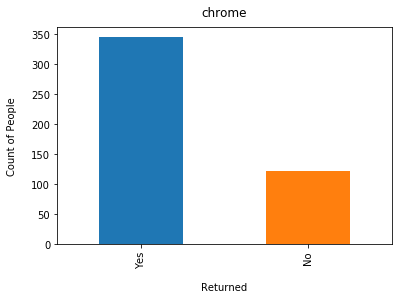

In [243]:
chrome['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('chrome', y=1.02);

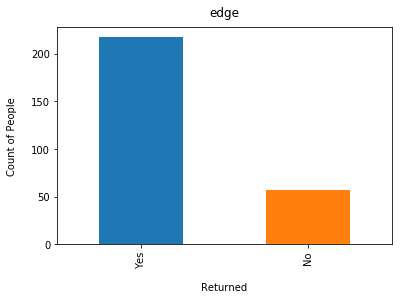

In [244]:
brsrs[brsrs['browser_Edge']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('edge', y=1.02);

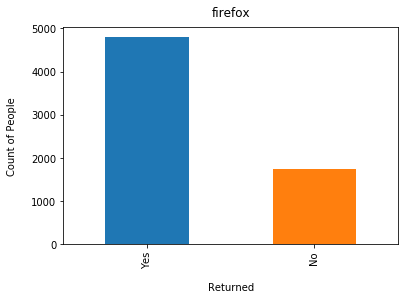

In [245]:
brsrs[brsrs['browser_Firefox']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('firefox', y=1.02);

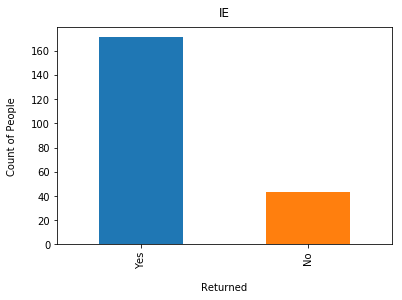

In [246]:
brsrs[brsrs['browser_IE']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('IE', y=1.02);

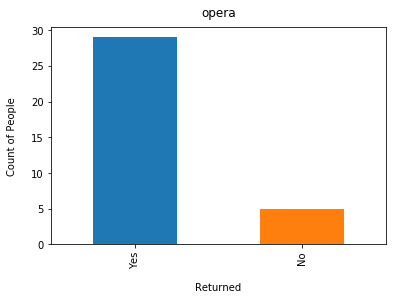

In [247]:
brsrs[brsrs['browser_Opera']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('opera', y=1.02);

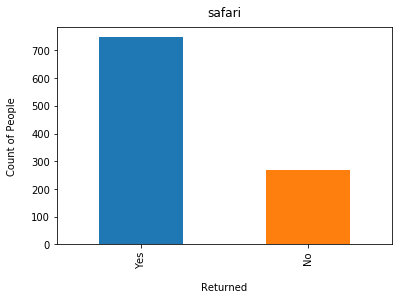

In [248]:
brsrs[brsrs['browser_Safari']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('safari', y=1.02);

In [249]:
operating = clipped[os].copy()
operating

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows
user_id,,,,,,
100057565415361423597239221229734238436,1.0,0.0,0.0,0.0,0.0,1.0
10008297250197642640412434822899674026,1.0,0.0,0.0,0.0,0.0,1.0
100103232984930506871964919813308121190,1.0,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1.0,0.0,0.0,0.0,1.0,0.0
100190729904287278129130570309608601853,1.0,0.0,0.0,0.0,0.0,1.0
10022870653033837263302996978880956235,0.0,0.0,0.0,0.0,0.0,1.0
100260128896771874314433414539792415509,1.0,0.0,0.0,0.0,1.0,0.0
100278847650473346718996516411374784382,1.0,0.0,0.0,0.0,0.0,1.0
100342456014438230713389942853501555711,1.0,0.0,0.0,0.0,0.0,1.0


In [250]:
operating = operating.replace([1,0], ['Yes','No'])
operating

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows
user_id,,,,,,
100057565415361423597239221229734238436,Yes,No,No,No,No,Yes
10008297250197642640412434822899674026,Yes,No,No,No,No,Yes
100103232984930506871964919813308121190,Yes,No,No,No,No,Yes
10018205113995011172245539900161896237,Yes,No,No,No,Yes,No
100190729904287278129130570309608601853,Yes,No,No,No,No,Yes
10022870653033837263302996978880956235,No,No,No,No,No,Yes
100260128896771874314433414539792415509,Yes,No,No,No,Yes,No
100278847650473346718996516411374784382,Yes,No,No,No,No,Yes
100342456014438230713389942853501555711,Yes,No,No,No,No,Yes


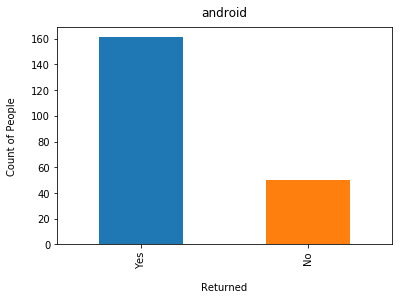

In [251]:
operating[operating['os_android']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('android', y=1.02);

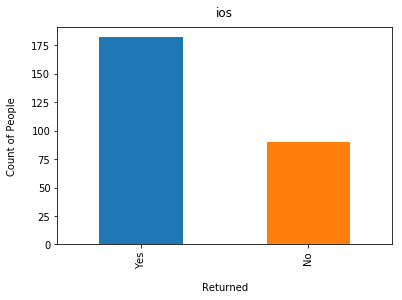

In [253]:
operating[operating['os_ios']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('ios', y=1.02);

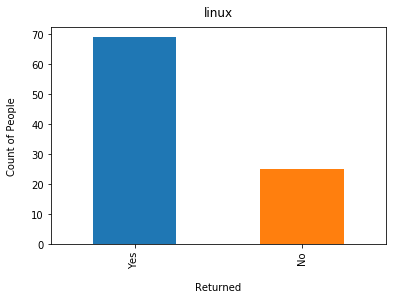

In [254]:
operating[operating['os_linux']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('linux', y=1.02);

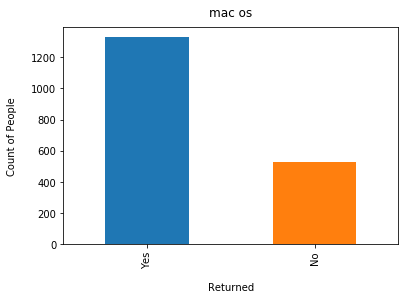

In [255]:
operating[operating['os_mac_os']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('mac os', y=1.02);

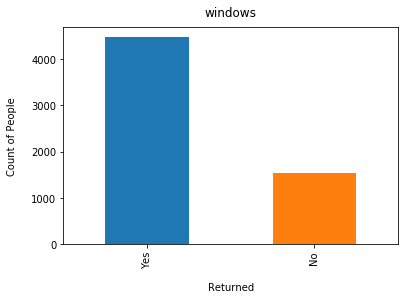

In [256]:
operating[operating['os_windows']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('windows', y=1.02);

In [257]:
planer = clipped[plan].copy()
planer

,returned,plan_monthly,plan_yearly
user_id,,,
100057565415361423597239221229734238436,1.0,1.0,0.0
10008297250197642640412434822899674026,1.0,1.0,0.0
100103232984930506871964919813308121190,1.0,1.0,0.0
10018205113995011172245539900161896237,1.0,1.0,0.0
100190729904287278129130570309608601853,1.0,1.0,0.0
10022870653033837263302996978880956235,0.0,1.0,0.0
100260128896771874314433414539792415509,1.0,1.0,0.0
100278847650473346718996516411374784382,1.0,1.0,0.0
100342456014438230713389942853501555711,1.0,1.0,0.0


In [258]:
planer = planer.replace([1,0], ['Yes','No'])
planer

,returned,plan_monthly,plan_yearly
user_id,,,
100057565415361423597239221229734238436,Yes,Yes,No
10008297250197642640412434822899674026,Yes,Yes,No
100103232984930506871964919813308121190,Yes,Yes,No
10018205113995011172245539900161896237,Yes,Yes,No
100190729904287278129130570309608601853,Yes,Yes,No
10022870653033837263302996978880956235,No,Yes,No
100260128896771874314433414539792415509,Yes,Yes,No
100278847650473346718996516411374784382,Yes,Yes,No
100342456014438230713389942853501555711,Yes,Yes,No


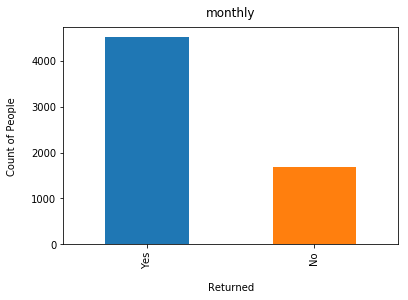

In [259]:
planer[planer['plan_monthly']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('monthly', y=1.02);

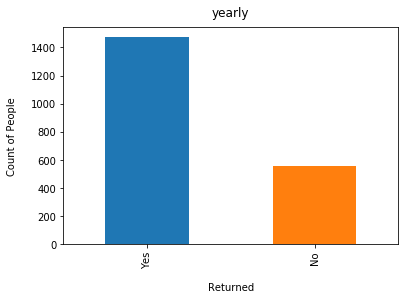

In [260]:
planer[planer['plan_yearly']=='Yes']['returned'].value_counts().plot(kind='bar')
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title('yearly', y=1.02);

In [261]:
pager = clipped[page].copy()
pager

,returned,page_compress,page_delete,page_edit,page_excel,page_extract,page_jpg,page_merge,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10022870653033837263302996978880956235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100260128896771874314433414539792415509,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100278847650473346718996516411374784382,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100342456014438230713389942853501555711,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [262]:
pager = pager.replace([1,0], ['Yes','No'])
pager

,returned,page_compress,page_delete,page_edit,page_excel,page_extract,page_jpg,page_merge,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No
10008297250197642640412434822899674026,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No
100103232984930506871964919813308121190,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes
10018205113995011172245539900161896237,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
100190729904287278129130570309608601853,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Yes
10022870653033837263302996978880956235,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
100260128896771874314433414539792415509,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
100278847650473346718996516411374784382,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
100342456014438230713389942853501555711,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes


(8213, 18)


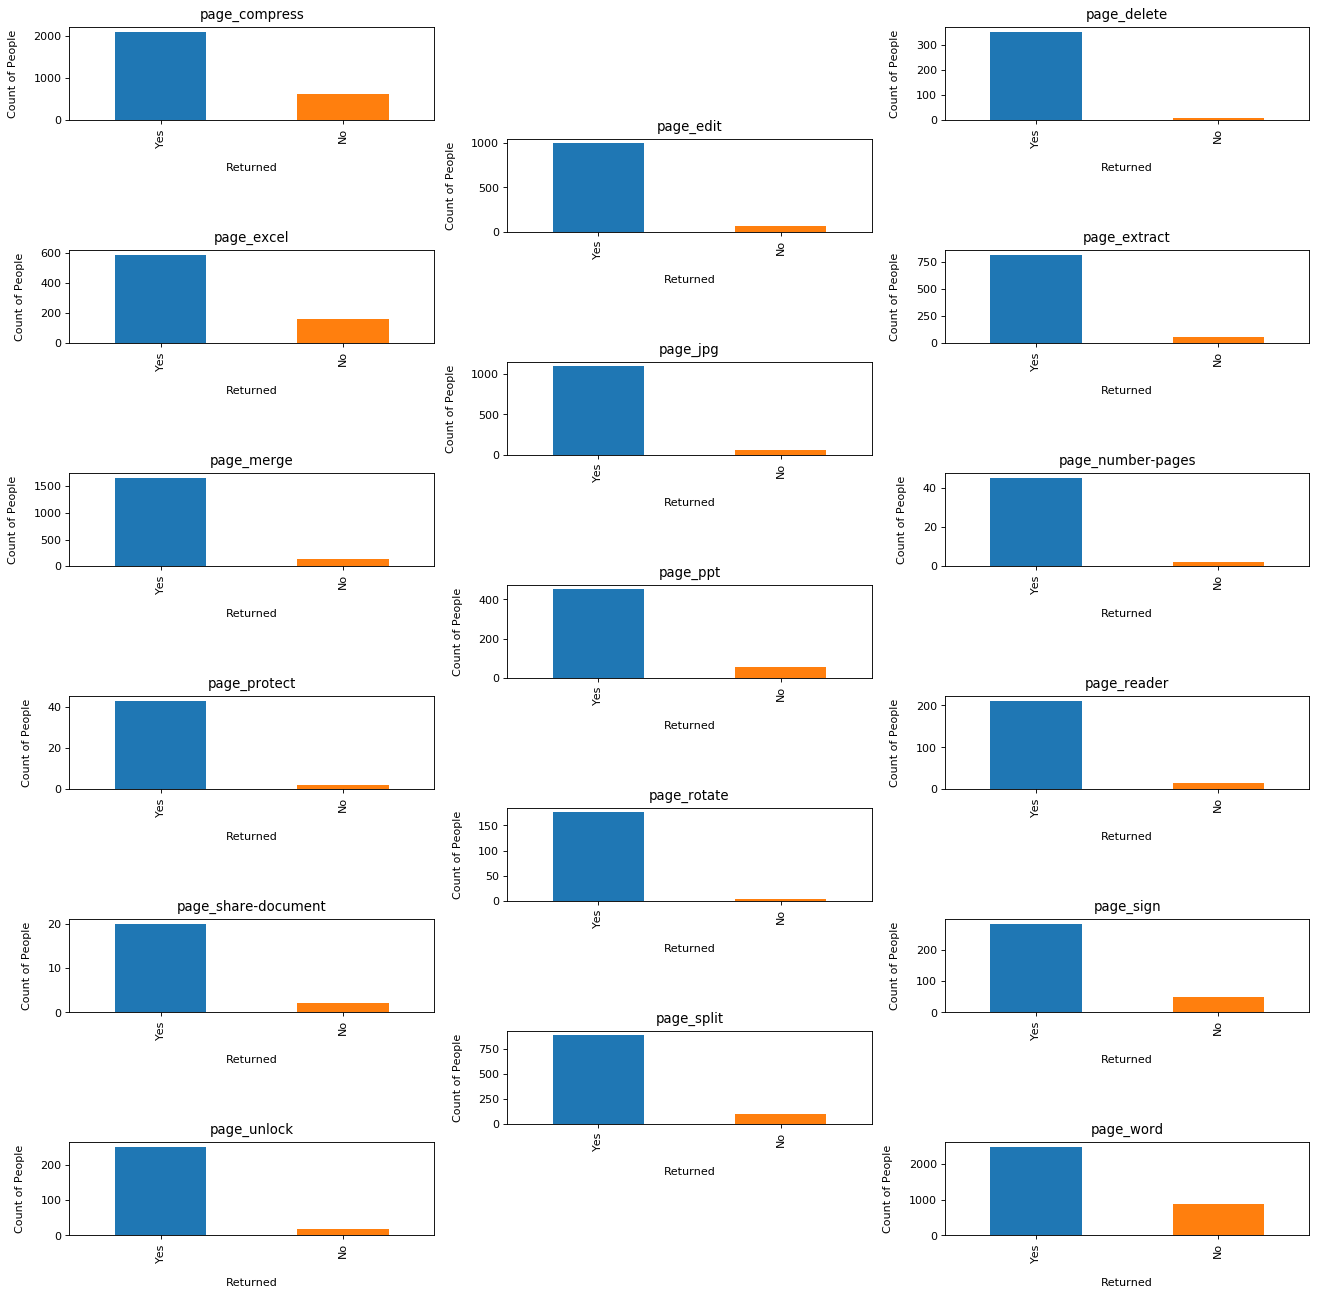

In [273]:
figure(figsize=(20, 20), dpi=80)
print(pager.shape)
px = pager.columns.values

for i in range(1, len(px)):
    plt.subplot(11, 3, 1+(i-1)*2)
    
    pager[pager[px[i]]=='Yes']['returned'].value_counts().plot(kind='bar')
    plt.xlabel("Returned", labelpad=14)
    plt.ylabel("Count of People", labelpad=14)
    plt.title(px[i], y=1.02);

# don't forget steps(story)
# https://ikuz.eu/csv2arff/ used to arff the changed data to make sure cant find an imbalanced working model